In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def square_signal(x):
    if x % 2 > 1:
        return 1
    else:
        return -1

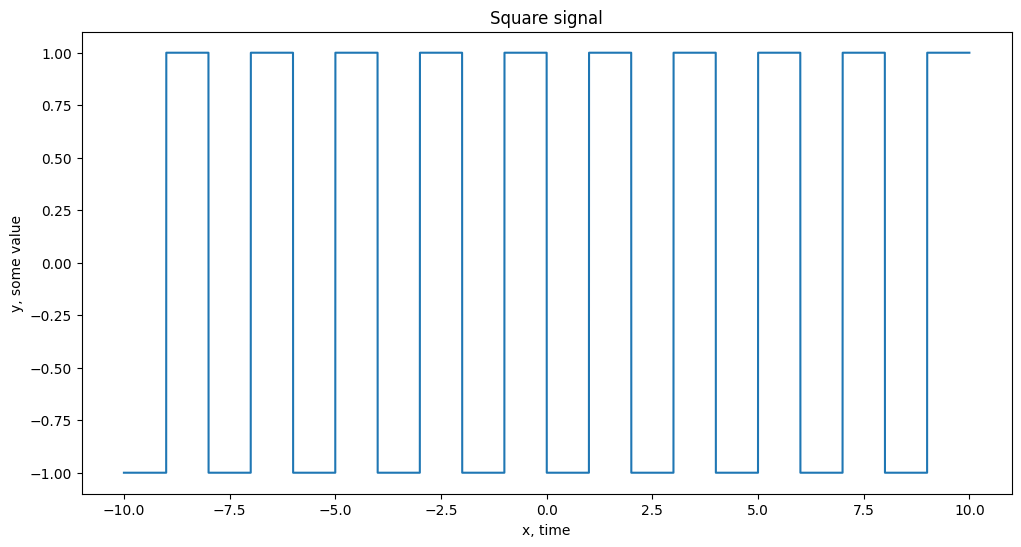

In [3]:
square_args = np.arange(-10, 10, 1 / 2000)
square_y = [square_signal(arg) for arg in square_args]

plt.figure(figsize=(12, 6))
plt.plot(square_args, square_y)
plt.title("Square signal")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

In [4]:
def kernel(x):
    return 0.003 * np.exp(-(x ** 2))

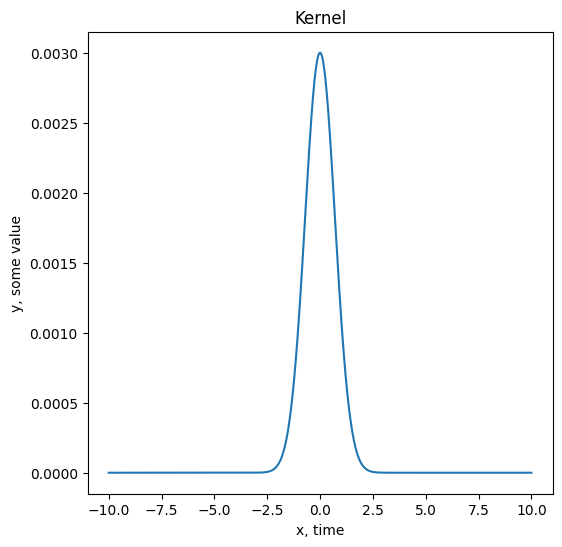

In [5]:
kernel_args = np.arange(-10, 10, 1 / 2000)
kernel_y = kernel(kernel_args)

plt.figure(figsize=(6, 6))
plt.plot(kernel_args, kernel_y)
plt.title("Kernel")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

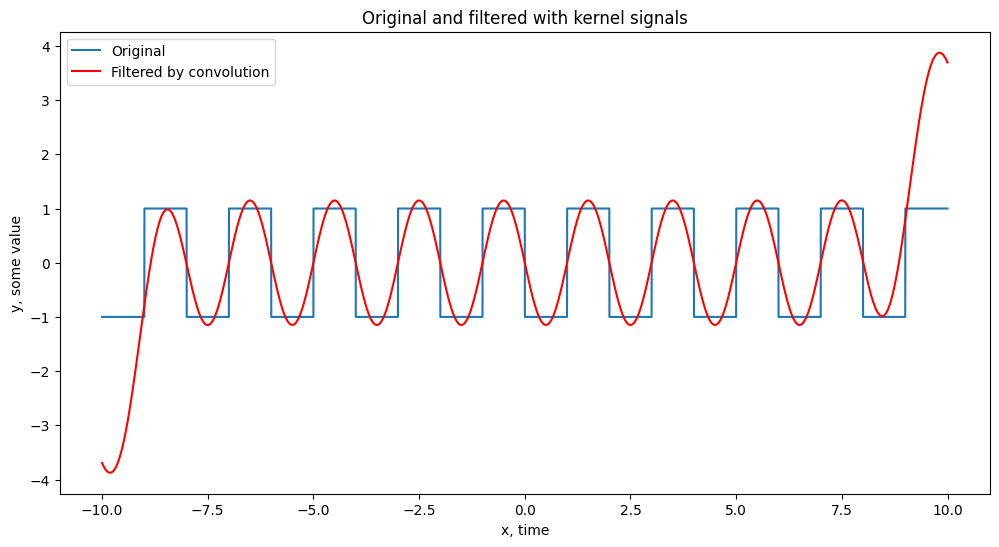

In [6]:
conv_y = np.convolve(square_y, kernel_y)

plt.figure(figsize=(12, 6))
plt.plot(square_args, square_y)
plt.plot(square_args, conv_y[20000:-19999], 'red')
plt.title("Original and filtered with kernel signals")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.legend(['Original', 'Filtered by convolution'])
plt.show()

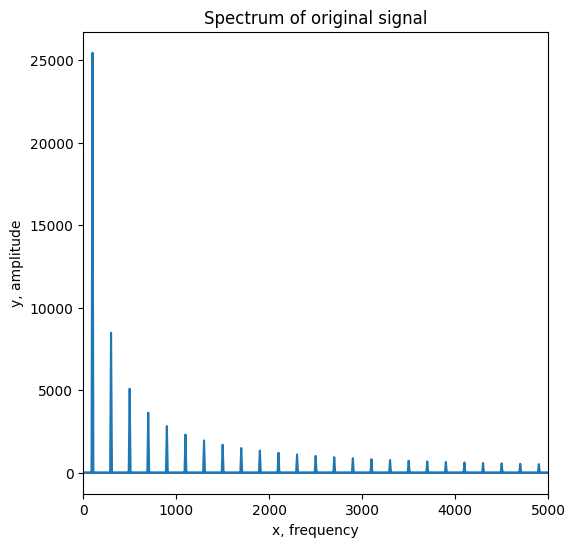

In [7]:
square_fft_freqs = np.fft.fftfreq(len(square_args), 0.1 / len(square_args))
square_fft_y = np.fft.fft(square_y)

plt.figure(figsize=(6, 6))
plt.plot(square_fft_freqs, np.abs(square_fft_y))
plt.xlim([0, 5000])
plt.title("Spectrum of original signal")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude") 
plt.show()

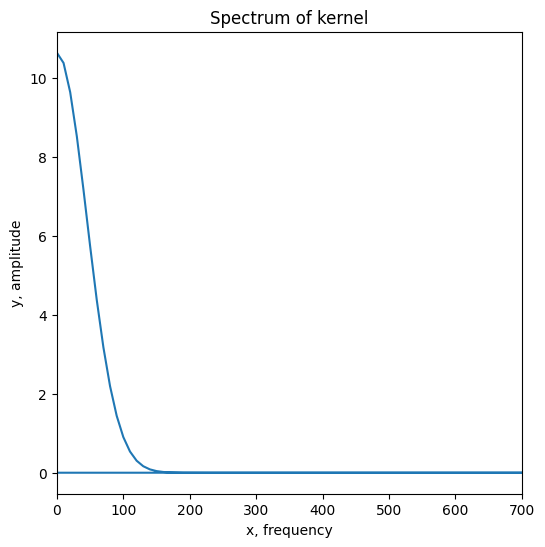

In [8]:
kernel_fft_y = np.fft.fft(kernel_y)

plt.figure(figsize=(6, 6))
plt.plot(square_fft_freqs, np.abs(kernel_fft_y))
plt.xlim([0, 700])
plt.title("Spectrum of kernel")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude") 
plt.show()

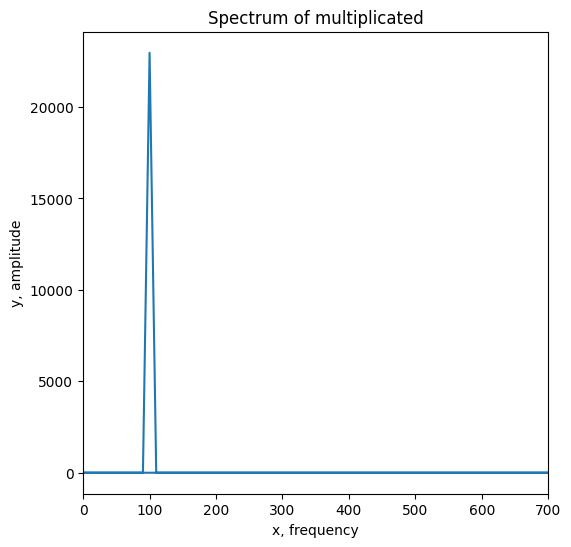

In [9]:
multiplication_fft_y = square_fft_y * kernel_fft_y

plt.figure(figsize=(6, 6))
plt.plot(square_fft_freqs, np.abs(multiplication_fft_y))
plt.xlim([0, 700])
plt.title("Spectrum of multiplicated")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude") 
plt.show()

c:\Users\ZhukZzz\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\ZhukZzz\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


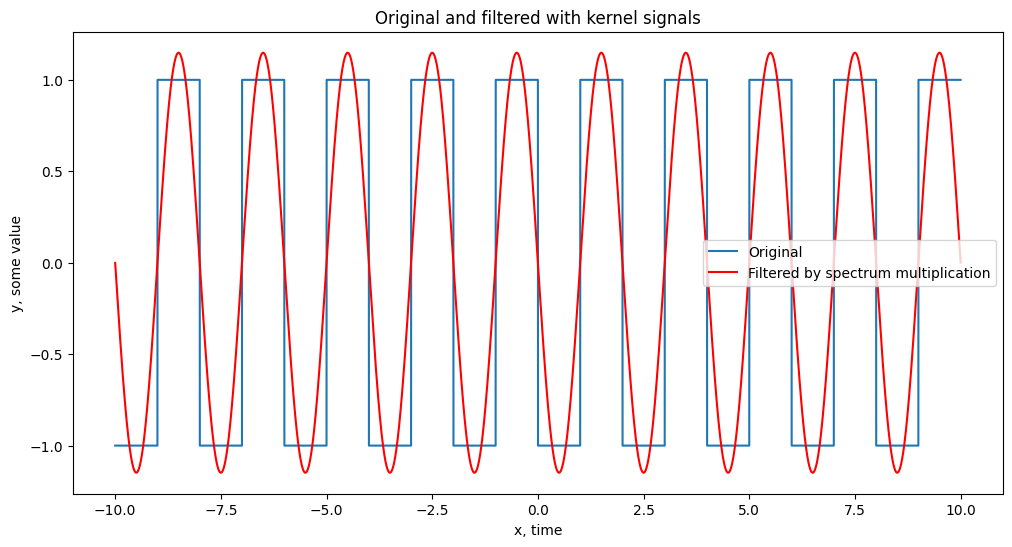

In [10]:
multiplication_from_ifft_y = np.fft.ifft(multiplication_fft_y)

plt.figure(figsize=(12, 6))
plt.plot(square_args, square_y)
plt.plot(square_args, multiplication_from_ifft_y, 'red')
plt.title("Original and filtered with kernel signals")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.legend(['Original', 'Filtered by spectrum multiplication'])
plt.show()

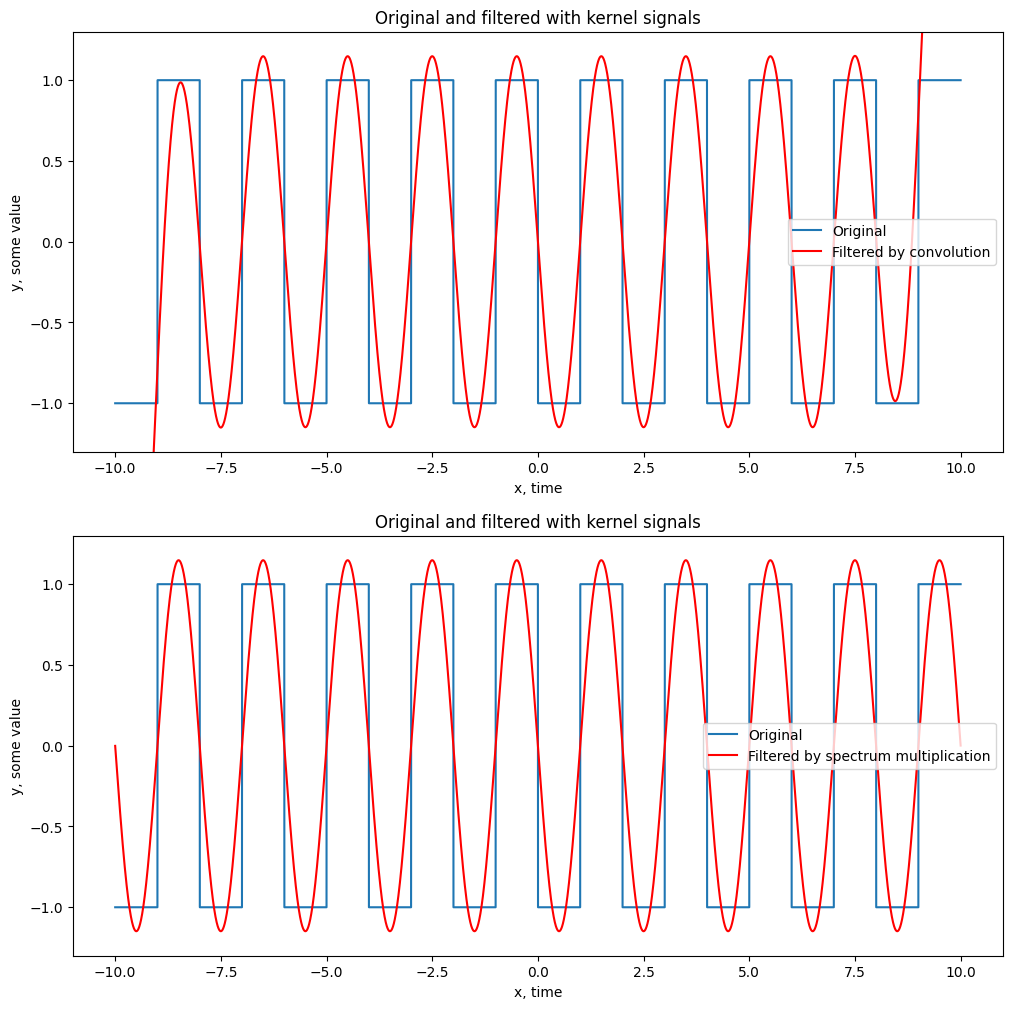

In [11]:
plt.figure(figsize=(12, 12))

plt.subplot(211)
plt.ylim([-1.3, 1.3])
plt.plot(square_args, square_y)
plt.plot(square_args, conv_y[20000:-19999], 'red')
plt.title("Original and filtered with kernel signals")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.legend(['Original', 'Filtered by convolution'])

plt.subplot(212)
plt.ylim([-1.3, 1.3])
plt.plot(square_args, square_y)
plt.plot(square_args, multiplication_from_ifft_y, 'red')
plt.title("Original and filtered with kernel signals")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.legend(['Original', 'Filtered by spectrum multiplication'])
plt.show()

In [42]:
def cos_func(x):
    f_1 = 50
    f_2 = 150
    w_1 = 2 * np.pi * f_1
    w_2 = 2 * np.pi * f_2
    return np.cos(w_1 * x) + np.cos(w_2 * x)

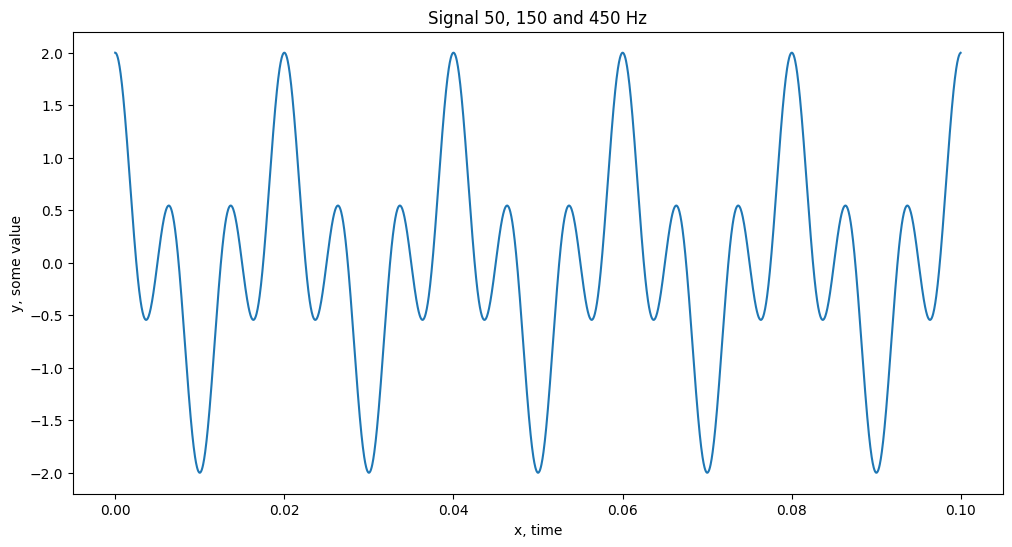

In [67]:
x_cos = np.arange(0, 0.1, 2 / 50000)
y_cos = cos_func(x_cos)

plt.figure(figsize=(12, 6))
plt.plot(x_cos, y_cos)
plt.title("Signal 50, 150 and 450 Hz")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

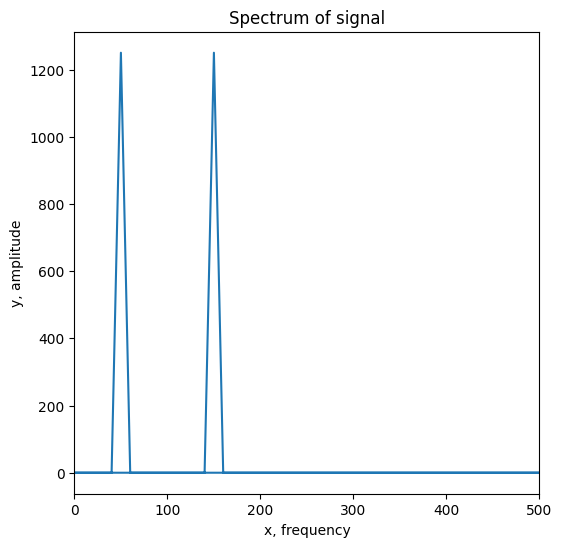

In [68]:
x_cos_fft = np.fft.fftfreq(len(x_cos), 0.1 / len(x_cos))
y_cos_fft = np.fft.fft(y_cos)

plt.figure(figsize=(6, 6))
plt.plot(x_cos_fft, np.abs(y_cos_fft))
plt.xlim([0, 500])
plt.title("Spectrum of signal")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude") 
plt.show()

In [69]:
def gaussian(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

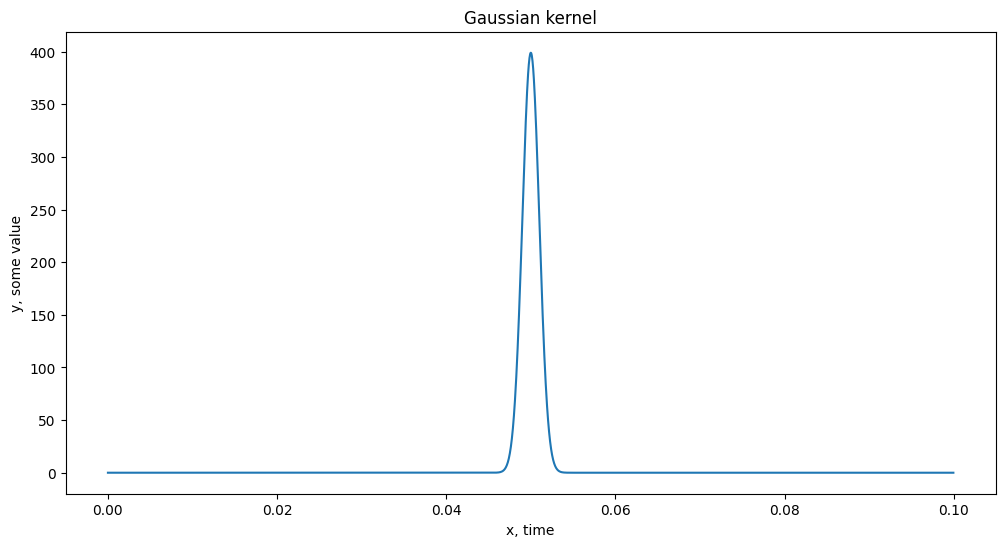

In [90]:
y_gauss = gaussian(x_cos, 0.05, 0.001)

plt.figure(figsize=(12, 6))
plt.plot(x_cos, y_gauss)
plt.title("Gaussian kernel")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

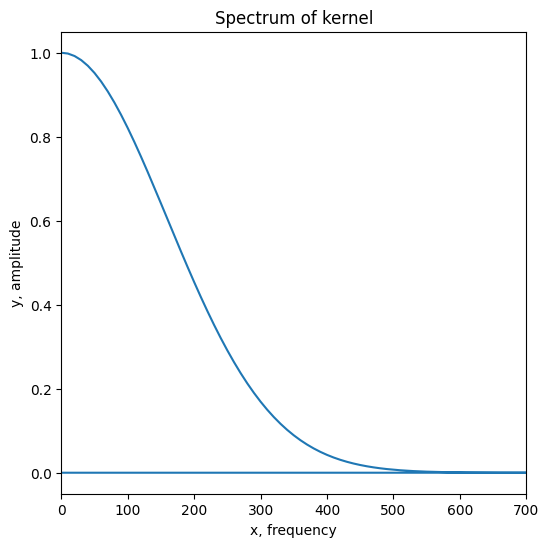

In [91]:
gauss_fft_y = np.fft.fft(y_gauss)
gauss_fft_y /= max(gauss_fft_y)

plt.figure(figsize=(6, 6))
plt.plot(x_cos_fft, np.abs(gauss_fft_y))
plt.xlim([0, 700])
plt.title("Spectrum of kernel")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude") 
plt.show()

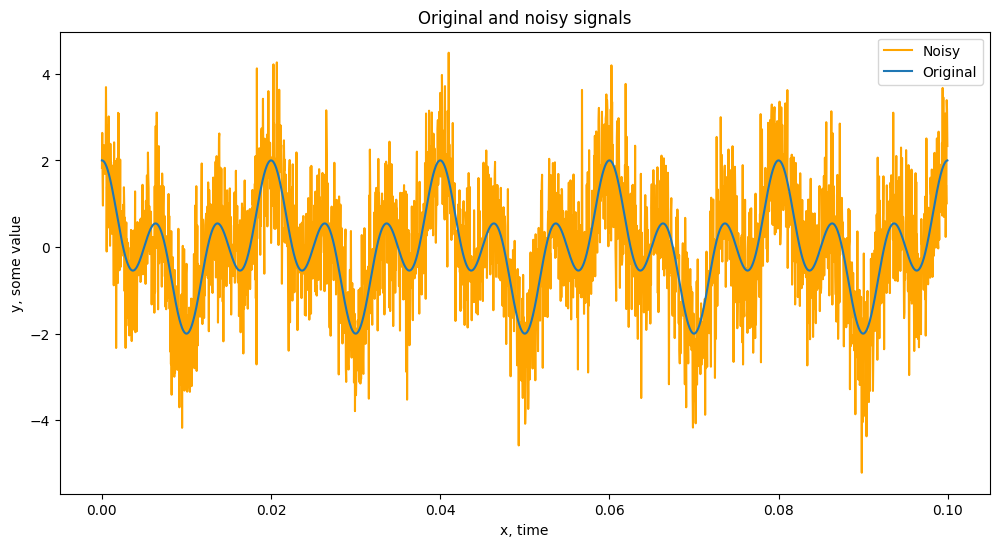

In [92]:
y_cos_noise = y_cos + np.random.normal(0, 1, 2500)

plt.figure(figsize=(12, 6))
plt.plot(x_cos, y_cos_noise, 'orange')
plt.plot(x_cos, y_cos)
plt.title("Original and noisy signals")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.legend(['Noisy', 'Original'])
plt.show()

Text(0, 0.5, 'y, amplitude')

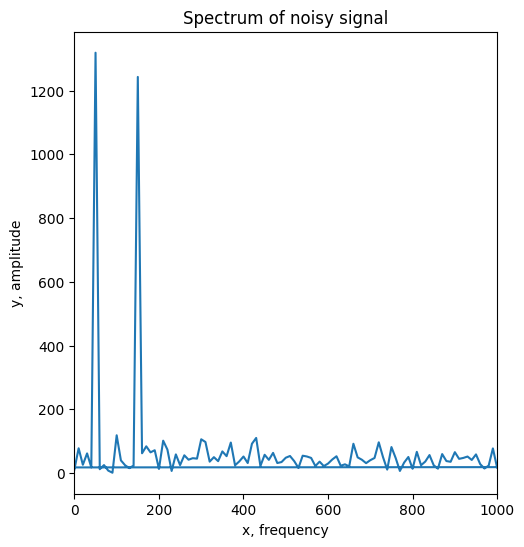

In [93]:
y_cos_noise_fft = np.fft.fft(y_cos_noise)

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(x_cos_fft, np.abs(y_cos_noise_fft))
plt.xlim([0, 1000])
plt.title("Spectrum of noisy signal")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude") 

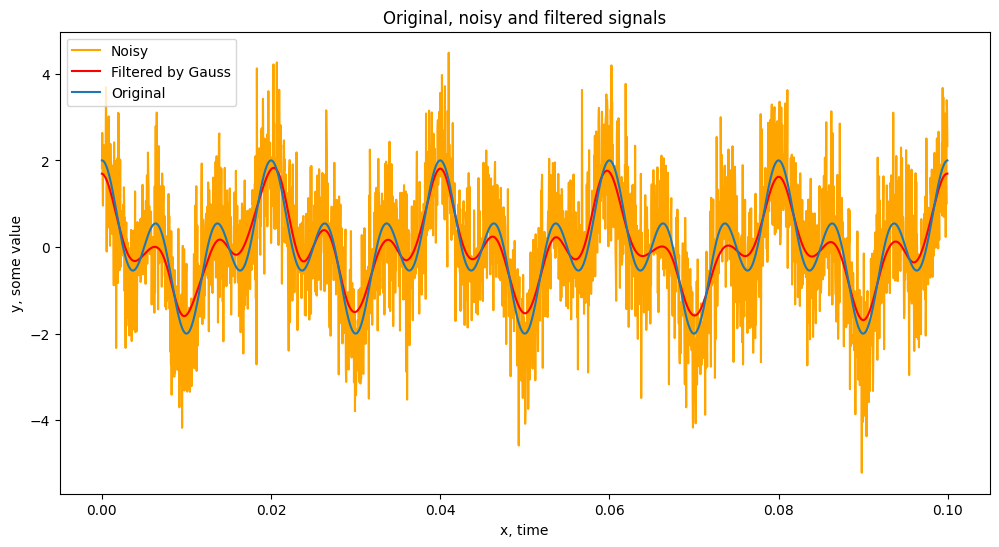

In [205]:
y_cos_noise_filtered_gauss_fft = y_cos_noise_fft * gauss_fft_y
y_cos_noise_filtered_gauss = np.fft.ifft(y_cos_noise_filtered_gauss_fft) * -1

plt.figure(figsize=(12, 6))
plt.plot(x_cos, y_cos_noise, 'orange')
plt.plot(x_cos, y_cos_noise_filtered_gauss, 'red')
plt.plot(x_cos, y_cos)
plt.title("Original, noisy and filtered signals")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.legend(['Noisy', 'Filtered by Gauss', 'Original'])
plt.show()

In [199]:
window_size = 80
eps = 0.5

In [200]:
def planck(size, eps):
    window = np.zeros(size)

    for i in range(size):
        if i == 0 or i == (size - 1):
            continue

        z_a = eps * (size - 1) * ((1 / i) + (1 / (i - eps * (size - 1))))
        z_b = eps * (size - 1) * (1 / (size - 1 - i) + 1 / ((1 - eps) * (size - 1) - i))

        if 0 < i < (eps * (size - 1)):
            window[i] = 1 / (np.exp(z_a) + 1)
        elif (eps * (size - 1)) <= i <= ((1 - eps) * (size - 1)):
            window[i] = 1
        elif ((1 - eps) * (size - 1)) < i < (size - 1):
            window[i] = 1 / (np.exp(z_b) + 1)
        else:
            window[i] = 0
    
    return window

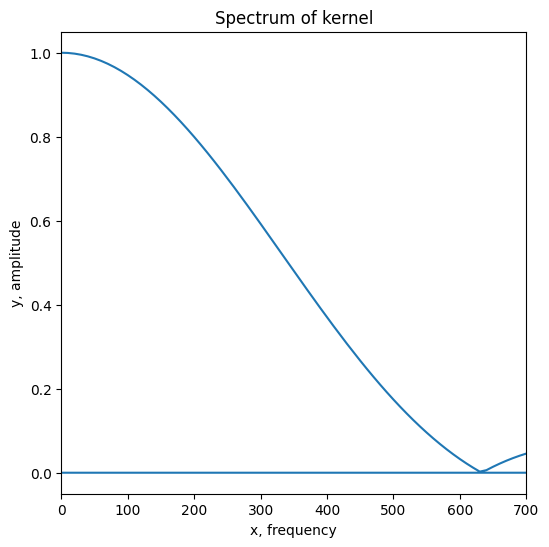

In [201]:
planck = planck(window_size, eps)
planck_fft_y = np.fft.fft(planck, n=len(y_cos_noise))
planck_fft_y /= max(planck_fft_y)

plt.figure(figsize=(6, 6))
plt.plot(x_cos_fft, np.abs(planck_fft_y))
plt.xlim([0, 700])
plt.title("Spectrum of kernel")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude") 
plt.show()

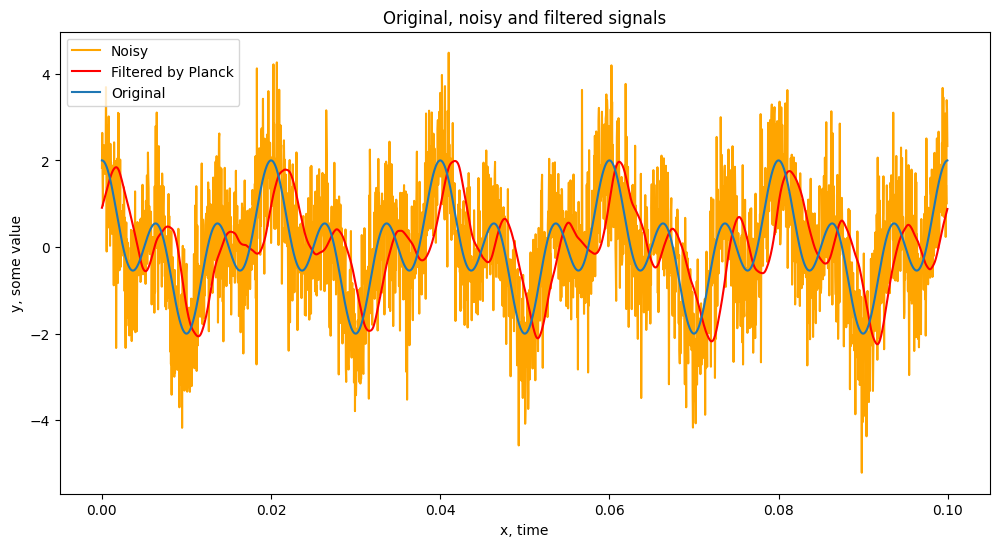

In [204]:
y_cos_noise_filtered_planck_fft = y_cos_noise_fft * planck_fft_y
y_cos_noise_filtered_planck = np.fft.ifft(y_cos_noise_filtered_planck_fft)

plt.figure(figsize=(12, 6))
plt.plot(x_cos, y_cos_noise, 'orange')
plt.plot(x_cos, y_cos_noise_filtered_planck, 'red')
plt.plot(x_cos, y_cos)
plt.title("Original, noisy and filtered signals")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.legend(['Noisy', 'Filtered by Planck', 'Original'])
plt.show()

c:\Users\ZhukZzz\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\ZhukZzz\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


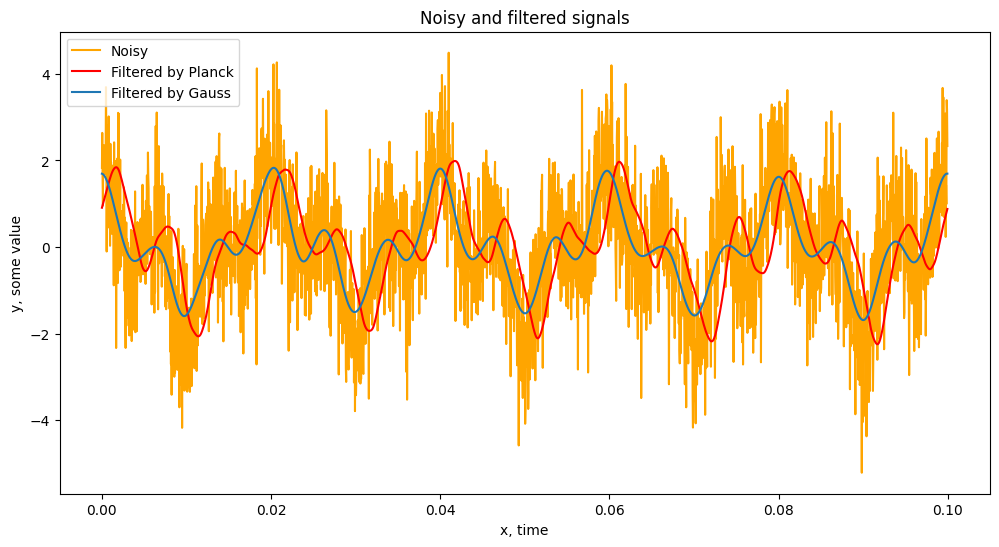

In [206]:
plt.figure(figsize=(12, 6))
plt.plot(x_cos, y_cos_noise, 'orange')
plt.plot(x_cos, y_cos_noise_filtered_planck, 'red')
plt.plot(x_cos, y_cos_noise_filtered_gauss)
plt.title("Noisy and filtered signals")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.legend(['Noisy', 'Filtered by Planck', 'Filtered by Gauss'])
plt.show()